In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data
# load packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set config
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

In [3]:
# load data
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
# avoid passing Session object to run 'ops'
# https://www.tensorflow.org/versions/r0.10/api_docs/python/client.html#InteractiveSession
sess = tf.InteractiveSession()

In [5]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [6]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [7]:
# Train
tf.initialize_all_variables().run()
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  train_step.run({x: batch_xs, y_: batch_ys})

In [8]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

0.9189


In [9]:
# visualize weights
W

In [10]:
# get weights from tensor
# http://stackoverflow.com/questions/36193553/get-the-value-of-some-weights-in-a-model-trained-by-tensorflow
sess.run(W)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


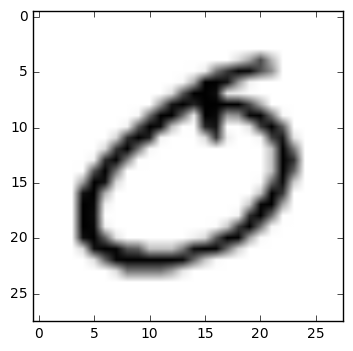

In [11]:
# look at an example where the label is '0' -- yep, 0 is labeled 0
zero_idxs = batch_ys[:, 0] == 1
zero = np.argwhere(zero_idxs == True)[0]
print(batch_ys[zero])
plt.imshow(batch_xs[zero, :].reshape((28, 28)), cmap='Greys')

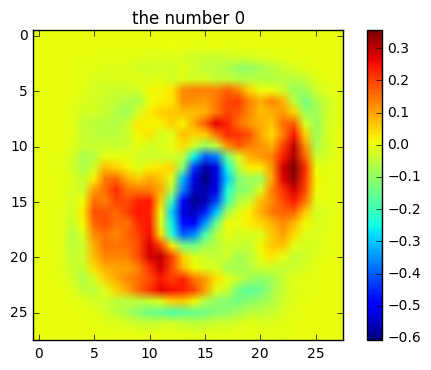

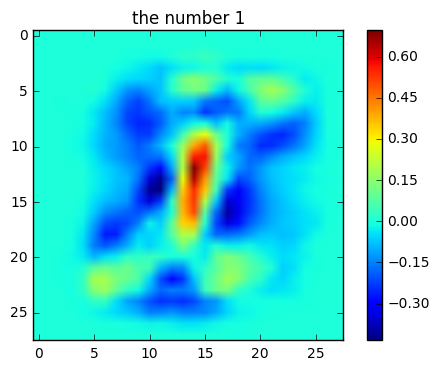

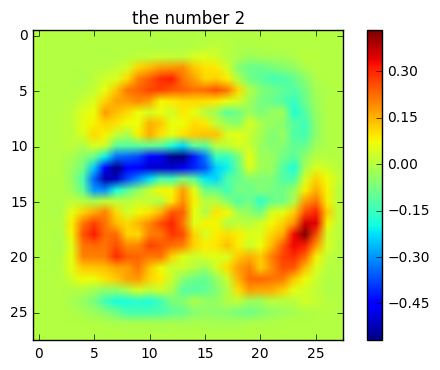

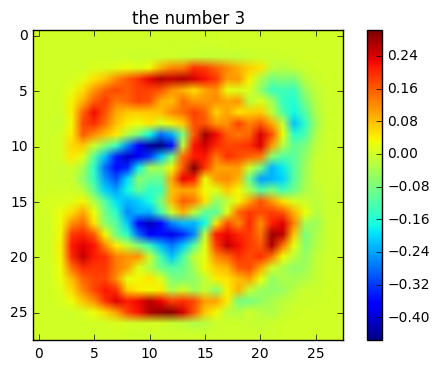

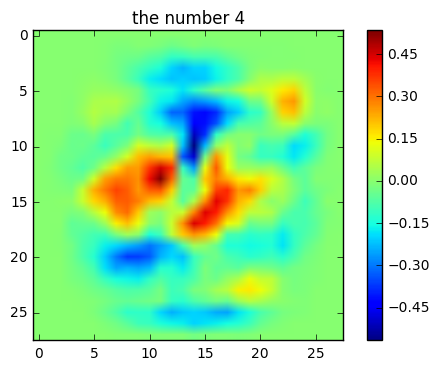

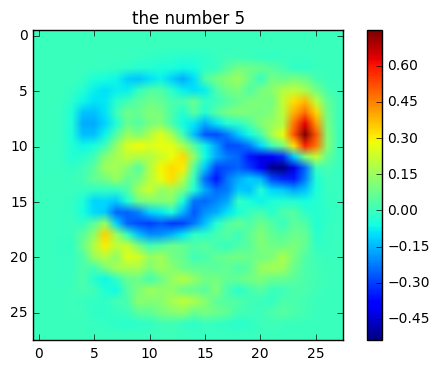

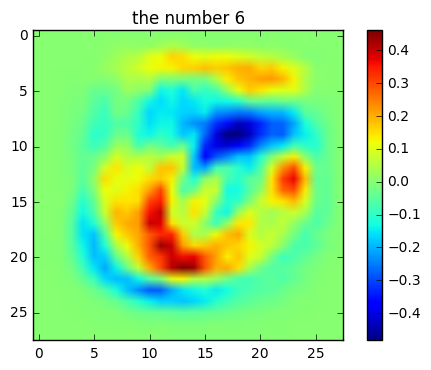

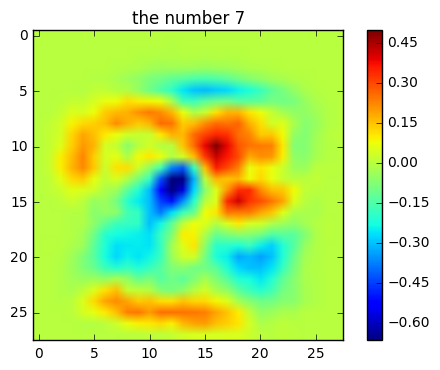

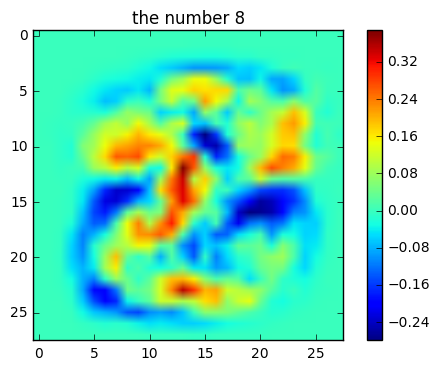

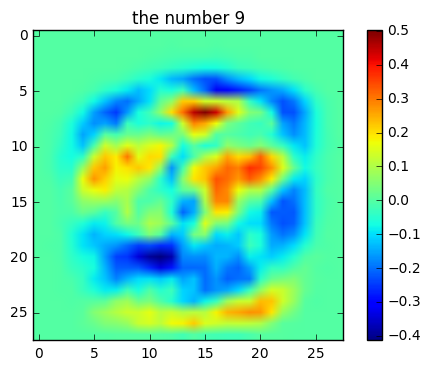

In [12]:
# visualize weights
# http://stackoverflow.com/questions/9638826/plot-a-black-and-white-binary-map-in-matplotlib
weights = sess.run(W)
for n in range(10):
    plt.imshow(weights[:, n].reshape((28, 28)))
    plt.title('the number ' + str(n))
    plt.colorbar()
    plt.show()

In [13]:
# check out the biases
sess.run(b)

array([-0.38537997,  0.33601424,  0.10254161, -0.22604188,  0.01842958,
        1.32282019, -0.10860388,  0.61655861, -1.44253302, -0.23380557], dtype=float32)